# Demo on phase modulation principles

This demo is supposed to shed some light on the principles of [phase modulation (PM)](https://en.wikipedia.org/wiki/Phase_modulation).

This demo is written by [Markus Nölle](https://www.htw-berlin.de/hochschule/personen/person/?eid=9586) for a basic course on communications engineering hold at the [university of applied siences, Berlin](https://www.htw-berlin.de/).

## Import libraries and set defaults

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import ipywidgets as widgets

plt.style.use('noelle.mplstyle')

## General parameters and functions

Basic parameters like sample rate, tmporal length of the signal, time axis and frequency axis are defined. Further, also a frequently used function is defined.

In [2]:
sr = 1e3 # sample rate
T = 4 # temporal length of signal
t = np.linspace(0, T-1/sr, T * int(sr))
f = np.fft.fftshift(np.fft.fftfreq(np.size(t), 1/sr))

In [3]:
def calc_magnitude_spectrum(x):
    mag_spec = np.abs(np.fft.fftshift(np.fft.fft(x))) / np.size(x)
    return mag_spec
    #freq = np.fft.fftshift(np.fft.fftfreq(np.size(x), 1/sr))
    #plt.plot(freq, mag_spec)

---

## Modulation

### Generation of the information signal

An examplary information signal (also known as [baseband signal](https://en.wikipedia.org/wiki/Baseband) ) is generated. In this case different signals can be used as information signal. Further, this signal and its corresponding [amplitude spectrum](https://en.wikipedia.org/wiki/Spectral_density#Explanation) is plotted.

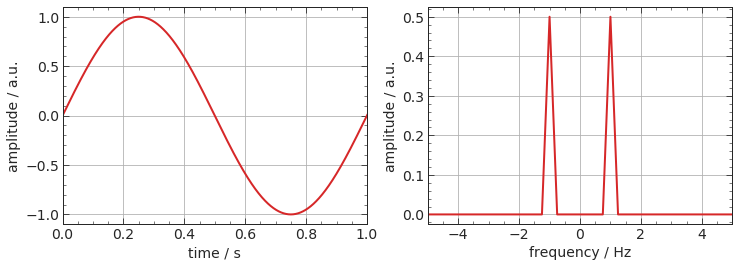

In [4]:
# sinosoidal information signal
fx = 1 # frequency of information signal
x = np.sin(2 * np.pi * fx * t)

# rect information signal
# x = (signal.square(2*np.pi/5*t, duty=0.1) + 1.0) / 2;

# exemplary information signal
#x = x = ((np.sin(2*np.pi*1.5*t) + np.sin(2*np.pi*2.1*t)) * np.exp(-t)) - 0.5
#x = x - np.mean(x)

n = np.size(x)

n_row = 1
n_col = 2
fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
fig = plt.figure(figsize=fig_size)

ax = fig.add_subplot(n_row, n_col, 1)
ax.plot(t, x, 'C3');
ax.set(xlabel="time / s", ylabel="amplitude / a.u.")
ax.set_xlim([0, 1])

ax = fig.add_subplot(n_row, n_col, 2)
ax.plot(f, calc_magnitude_spectrum(x), color='C3')
ax.set(xlabel="frequency / Hz", ylabel="amplitude / a.u.")
ax.set_xlim(-5, 5);

### Generation of the carrier signal

A [carrier signal](https://en.wikipedia.org/wiki/Carrier_wave) with a specified carrier frequency is generated. Further, this signal and its corresponding [amplitude spectrum](https://en.wikipedia.org/wiki/Spectral_density#Explanation) is plotted.

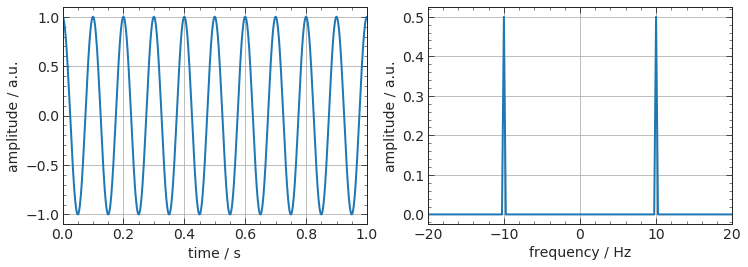

In [5]:
fc = 10

c = np.cos(2 * np.pi * fc * t)

n_row = 1
n_col = 2
fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
fig = plt.figure(figsize=fig_size)

ax = fig.add_subplot(n_row, n_col, 1)
ax.plot(t, c)
ax.set(xlabel="time / s", ylabel="amplitude / a.u.")
ax.set_xlim([0, 1])

ax = fig.add_subplot(n_row, n_col, 2)
#ax[1].magnitude_spectrum(x, sides="twosided", Fs=sr, scale="linear", color='r'); # scale="dB" or "linear"
ax.plot(f, calc_magnitude_spectrum(c))
ax.set(xlabel="frequency / Hz", ylabel="amplitude / a.u.")
ax.set_xlim(-2*fc, 2*fc);

### Actual phase modulation

The phase modulated bandpass signal can be described as

$$ x_{PM}(t) = a_c \cdot \cos \left( \omega_ct + K_{PM} x(t)\right) ,$$

where $\omega_c$ is the carrier frequency, $K_{PM}$ is a proportional constant and $x(t)$ is the information (or baseband) signal. In this demo, the [maximum phase deviation](https://en.wikipedia.org/wiki/Phase_modulation) $\Delta\phi_{\text{max}}$ is defined as

$$ \Delta \phi_{\text{max}}=K_{PM} \cdot \text{max}\{|x(t)|\}.$$

As output, the modulated and unmodulated carrier, togethter with the information signal is plotted. Further, also the phase of the modulated and unmodualted carrier on the one hand and the amplitude spectrum of tte modulated bandpass signal on the other is shown.

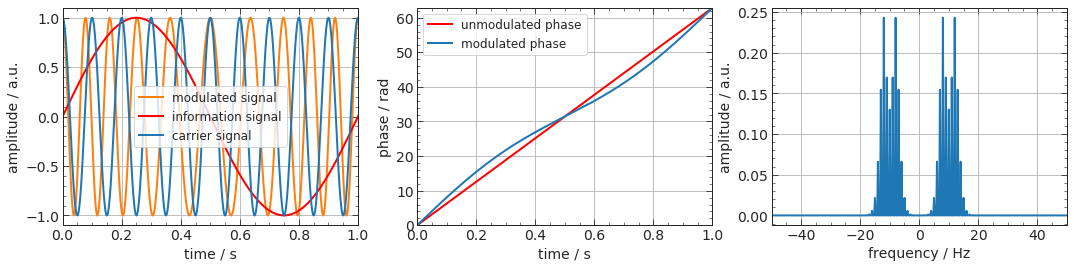

In [6]:
maxx = np.max(np.abs(x))
delta_phi = 3
k_pm = delta_phi / maxx

# modulation
x_pm_bp = np.cos(2 * np.pi * fc * t + k_pm*x)

n_row = 1
n_col = 3
fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
fig = plt.figure(figsize=fig_size)

ax = fig.add_subplot(n_row, n_col, 1)
ax.plot(t, x_pm_bp, 'C1', t, x, 'r', t, c, 'C0');
ax.set(xlabel="time / s", ylabel="amplitude / a.u.")
ax.axis([0, 1, 1.1*np.min(x), 1.1*np.max(x)])
ax.legend(('modulated signal', 'information signal', 'carrier signal'))

ax = fig.add_subplot(n_row, n_col, 2)
ax.plot(t, 2 * np.pi * fc * t, 'r', t, 2 * np.pi * fc * t + k_pm*x, 'C0');
# ax.set_xlim([0, 1])
ax.axis([0, 1, 0,  2 * np.pi * fc * 1.0 + k_pm*x[t==1]])
ax.set(xlabel="time / s", ylabel="phase / rad")
ax.legend(('unmodulated phase', 'modulated phase'))

ax = fig.add_subplot(n_row, n_col, 3)
#ax[2].magnitude_spectrum(x, sides="twosided", Fs=sr, scale="linear", color='r'); # scale="dB" or "linear"
ax.plot(f, calc_magnitude_spectrum(x_pm_bp))
ax.set(xlabel="frequency / Hz", ylabel="amplitude / a.u.")
ax.set_xlim(-5*fc, 5*fc);